# Customer churn prediction in Banking

## Main Objective of the task:
In this portfolio task, I will be implementing model for predicting customer churn based on the given features.


### Description of Customer churn dataset:
* This dataset contains information about bank customers and their churn status, which indicates whether they have exited the bank or not.
* It is majorly used for exploring and analyzing factors influencing customer churn in banking sectors.
* We will be using Churn_modelling.csv dataset in order to train our Machine Learning Model.



# Problem Statement:
Predicting the Churn Status based on the customers details of bank available in the Churn_modelling dataset

### Brief description of problem statement

* Predicting customer attrition in a banking setting is the current challenge. 
* The occurrence where clients discontinue using a bank's services is known as customer churn.
* For banks, being able to identify which clients are most likely to leave is essential because it enables them to take proactive measures to keep those customers, which may lower losses and enhance customer relations.



# Importing necessary libraries

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score


# Reading the Dataset

In [170]:
# Loading the dataset using read_csv method
df = pd.read_csv("Churn_modelling.csv")

# Exploring the dataset

In [172]:
# Displaying the top 5 records of dataset using .head method
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [173]:
## Displaying the rows and columns available in the dataset
print("The total number of rows available in the dataset are",df.shape[0])
print("the total number of columns available in the dataset are",df.shape[1])

The total number of rows available in the dataset are 10000
the total number of columns available in the dataset are 14


In [174]:
# Displaying the columns/features availble in the dataset using .columns method
print("The available column/features in the dataset are: \n" , df.columns)

The available column/features in the dataset are: 
 Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [175]:
# Displaying the datatype of each column in the dataset using .dtypes method
print("The data type of each column available in our dataset are: \n" , df.dtypes)

The data type of each column available in our dataset are: 
 RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [176]:
## Displaying the information of each column in the dataset using .info method
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [177]:
## Displaying the statistical data of each column using .describe method
print(df.describe())

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

## Description of features/cloumns

* **RowNumber:** The sequential number assigned to each row in the dataset.

* **CustomerId:** A unique identifier assigned for each customer.

* **Surname:** The surname of the customer.

* **CreditScore:** The credit score associated with each of the customer.

* **Geography:** The geographical location of the customer (e.g., country or region).

* **Gender:** The gender of the customer.(eg., Female , Male)

* **Age:** The age of the customer.

* **Tenure:** The number of years the customer has been with the bank.

* **Balance:** The account balance of the customer.

* **NumOfProducts:** The number of bank products the customer has.

* **HasCrCard:** Indicates whether the customer has a credit card (binary: yes/no).

* **IsActiveMember:** Indicates whether the customer is an active member (binary: yes/no).

* **EstimatedSalary:** The estimated salary of the customer.

* **Exited:** Indicates whether the customer has exited the bank (binary: yes/no 0/1).

# Data Exploration

In [181]:
## Checking if there are any null values in the dataset using isnull method
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Exploratory Data Analysis

## Univariate Analysis

### Ploting the graphs on each numerical columns

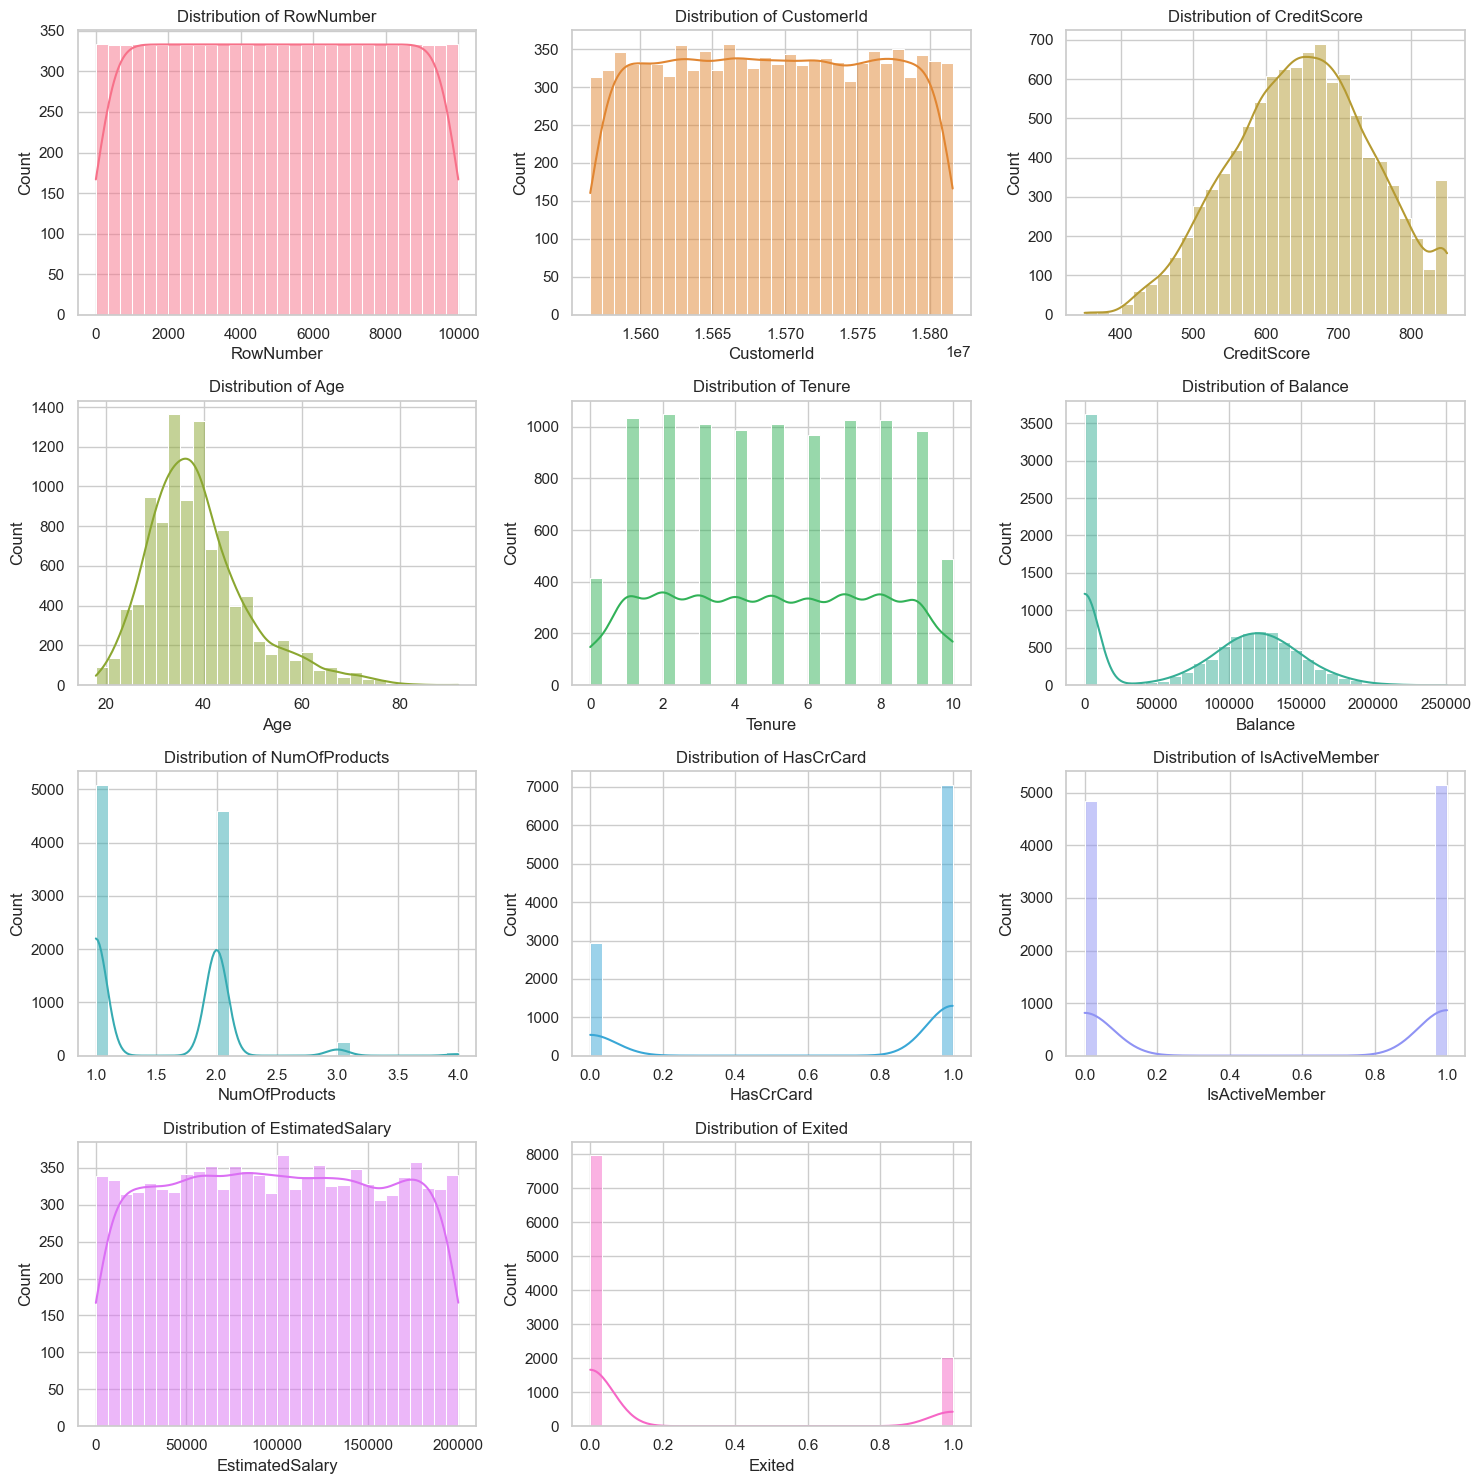

In [185]:
numerical_column = df.select_dtypes(include=['int64', 'float64']).columns
## Seting the figure size and creating subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

## Flatten the 2D array of axes for easy iteration
axes = axes.flatten()  

## Choosing a color palette
colors = sns.color_palette("husl", len(numerical_column)) 


## Iterating through the numerical columns and ploting the graph

for i, col in enumerate(numerical_column):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i], color=colors[i])
    axes[i].set_title(f'Distribution of {col}')

## Hiding any unused subplots
for j in range(len(numerical_column), len(axes)):
    fig.delaxes(axes[j])

## Adjusting layout
plt.tight_layout()
plt.show()

### Ploting the value counts for each categorical columns

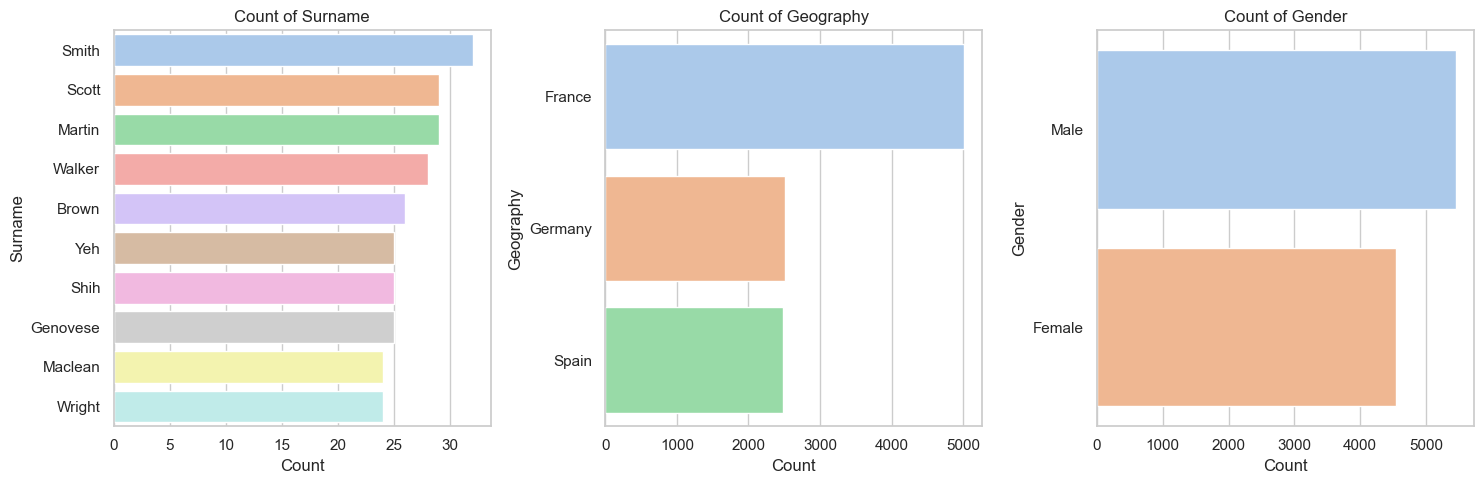

In [187]:
## Defining and selecting the categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
num_cols = 3
## Creating the subplots by defining the figure size
num_rows = (len(categorical_columns) + num_cols - 1) // len(categorical_columns) 
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15,5))

## Flattening the 2D array of axes
axes = axes.flatten()  

## Choosing a color palette for each graph
colors = sns.color_palette("pastel", n_colors=10)

## Iterating through each categorical columns and ploting the value counts
for i, col in enumerate(categorical_columns):
    top_10_values = df[col].value_counts().nlargest(10).index
    sns.countplot(y=df[col], order=top_10_values, ax=axes[i], palette=colors)
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(col)


## Adjusting the layout
plt.tight_layout()
plt.show()

## Bi Variate Analysis

### Ploting the boxplots for each numerical columns vs target variable

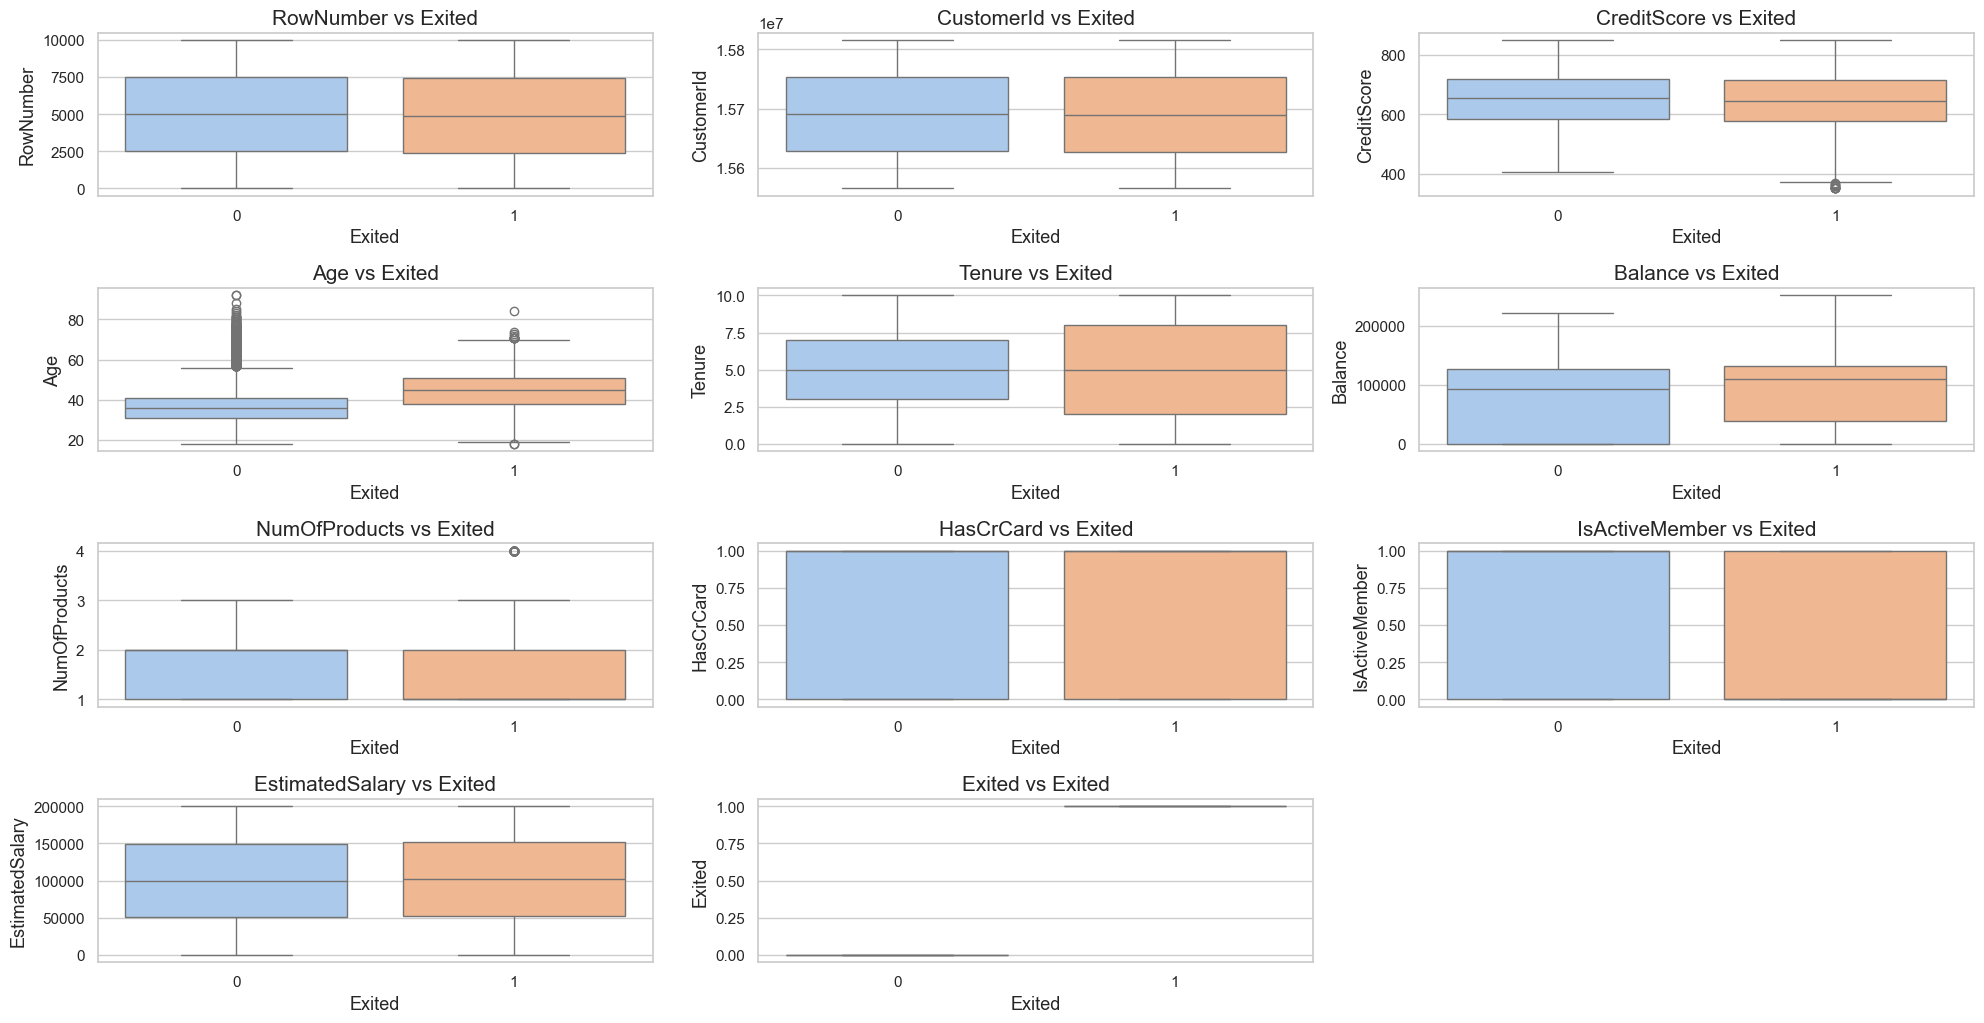

In [190]:
## Creating subplots and defining the size of each figure
num_rows = (len(numerical_column) + num_cols - 1) // 2  # Calculate required rows
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 15))

## Flattening the 2D array of axes
axes = axes.flatten() 

## Defining a color palette
palette = "pastel"

target_variable = 'Exited'
## Iterating through each numerical columns and plotting the boxplots
for i, col in enumerate(numerical_column):
    sns.boxplot(x=target_variable, y=col, data=df, ax=axes[i], palette=palette)
    axes[i].set_title(f'{col} vs {target_variable}', fontsize=15)
    axes[i].set_xlabel(target_variable, fontsize=13)
    axes[i].set_ylabel(col, fontsize=13)

## Hiding any unused subplots
for j in range(len(numerical_column), len(axes)):
    fig.delaxes(axes[j])

## Adjusting the layoit and displaying the graphs
plt.tight_layout()
plt.show()


### Ploting the countplot for each categorical variable vs taget variable

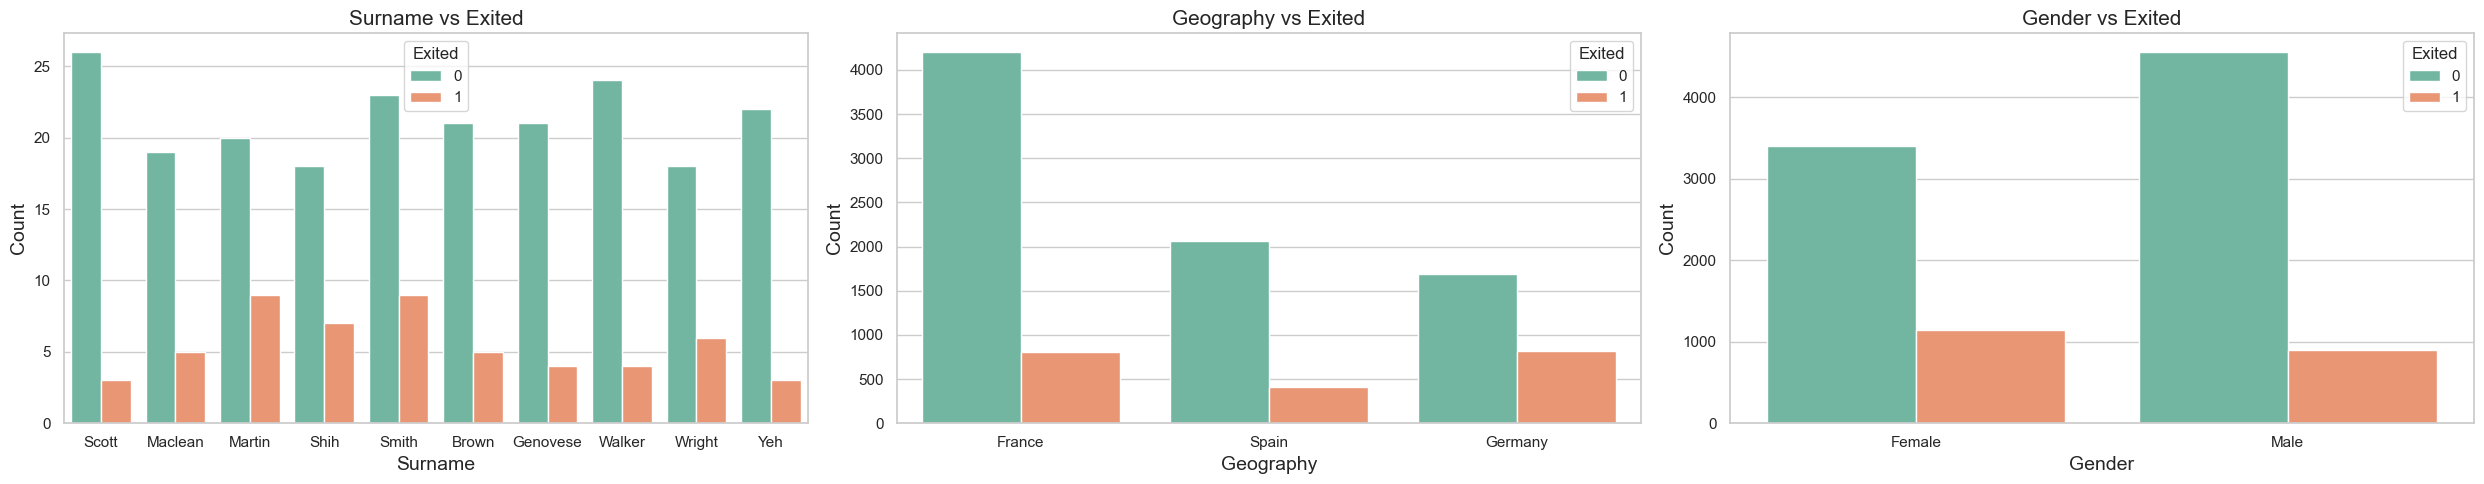

In [192]:
## Creating the subplots and defining the size of each graph
num_rows = (len(categorical_columns) + num_cols - 1) // 5
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(25, 5))

## Flattening the 2D array of axes
axes = axes.flatten()

## Choosing a color palette for better distinction
palette = sns.color_palette("Set2", n_colors=len(df[target_variable].unique()))

## Iterating through each categorical columns and plotting count plot
for i, col in enumerate(categorical_columns):
    
    ## Fetching the top 10 values for the current column
    top_10_values = df[col].value_counts().nlargest(10).index
    
    ## Creating a count plot for the top 10 values
    sns.countplot(x=col, hue=target_variable, data=df[df[col].isin(top_10_values)], ax=axes[i], palette=palette)
    
    ## Defining the plot
    axes[i].set_title(f'{col} vs {target_variable}', fontsize=15)
    axes[i].set_xlabel(col, fontsize=14)
    axes[i].set_ylabel('Count', fontsize=14)
    axes[i].legend(title=target_variable)

for j in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[j])

## Adjust the layout and displaying the graph
plt.tight_layout()
plt.show()

## Multi variate Analysis

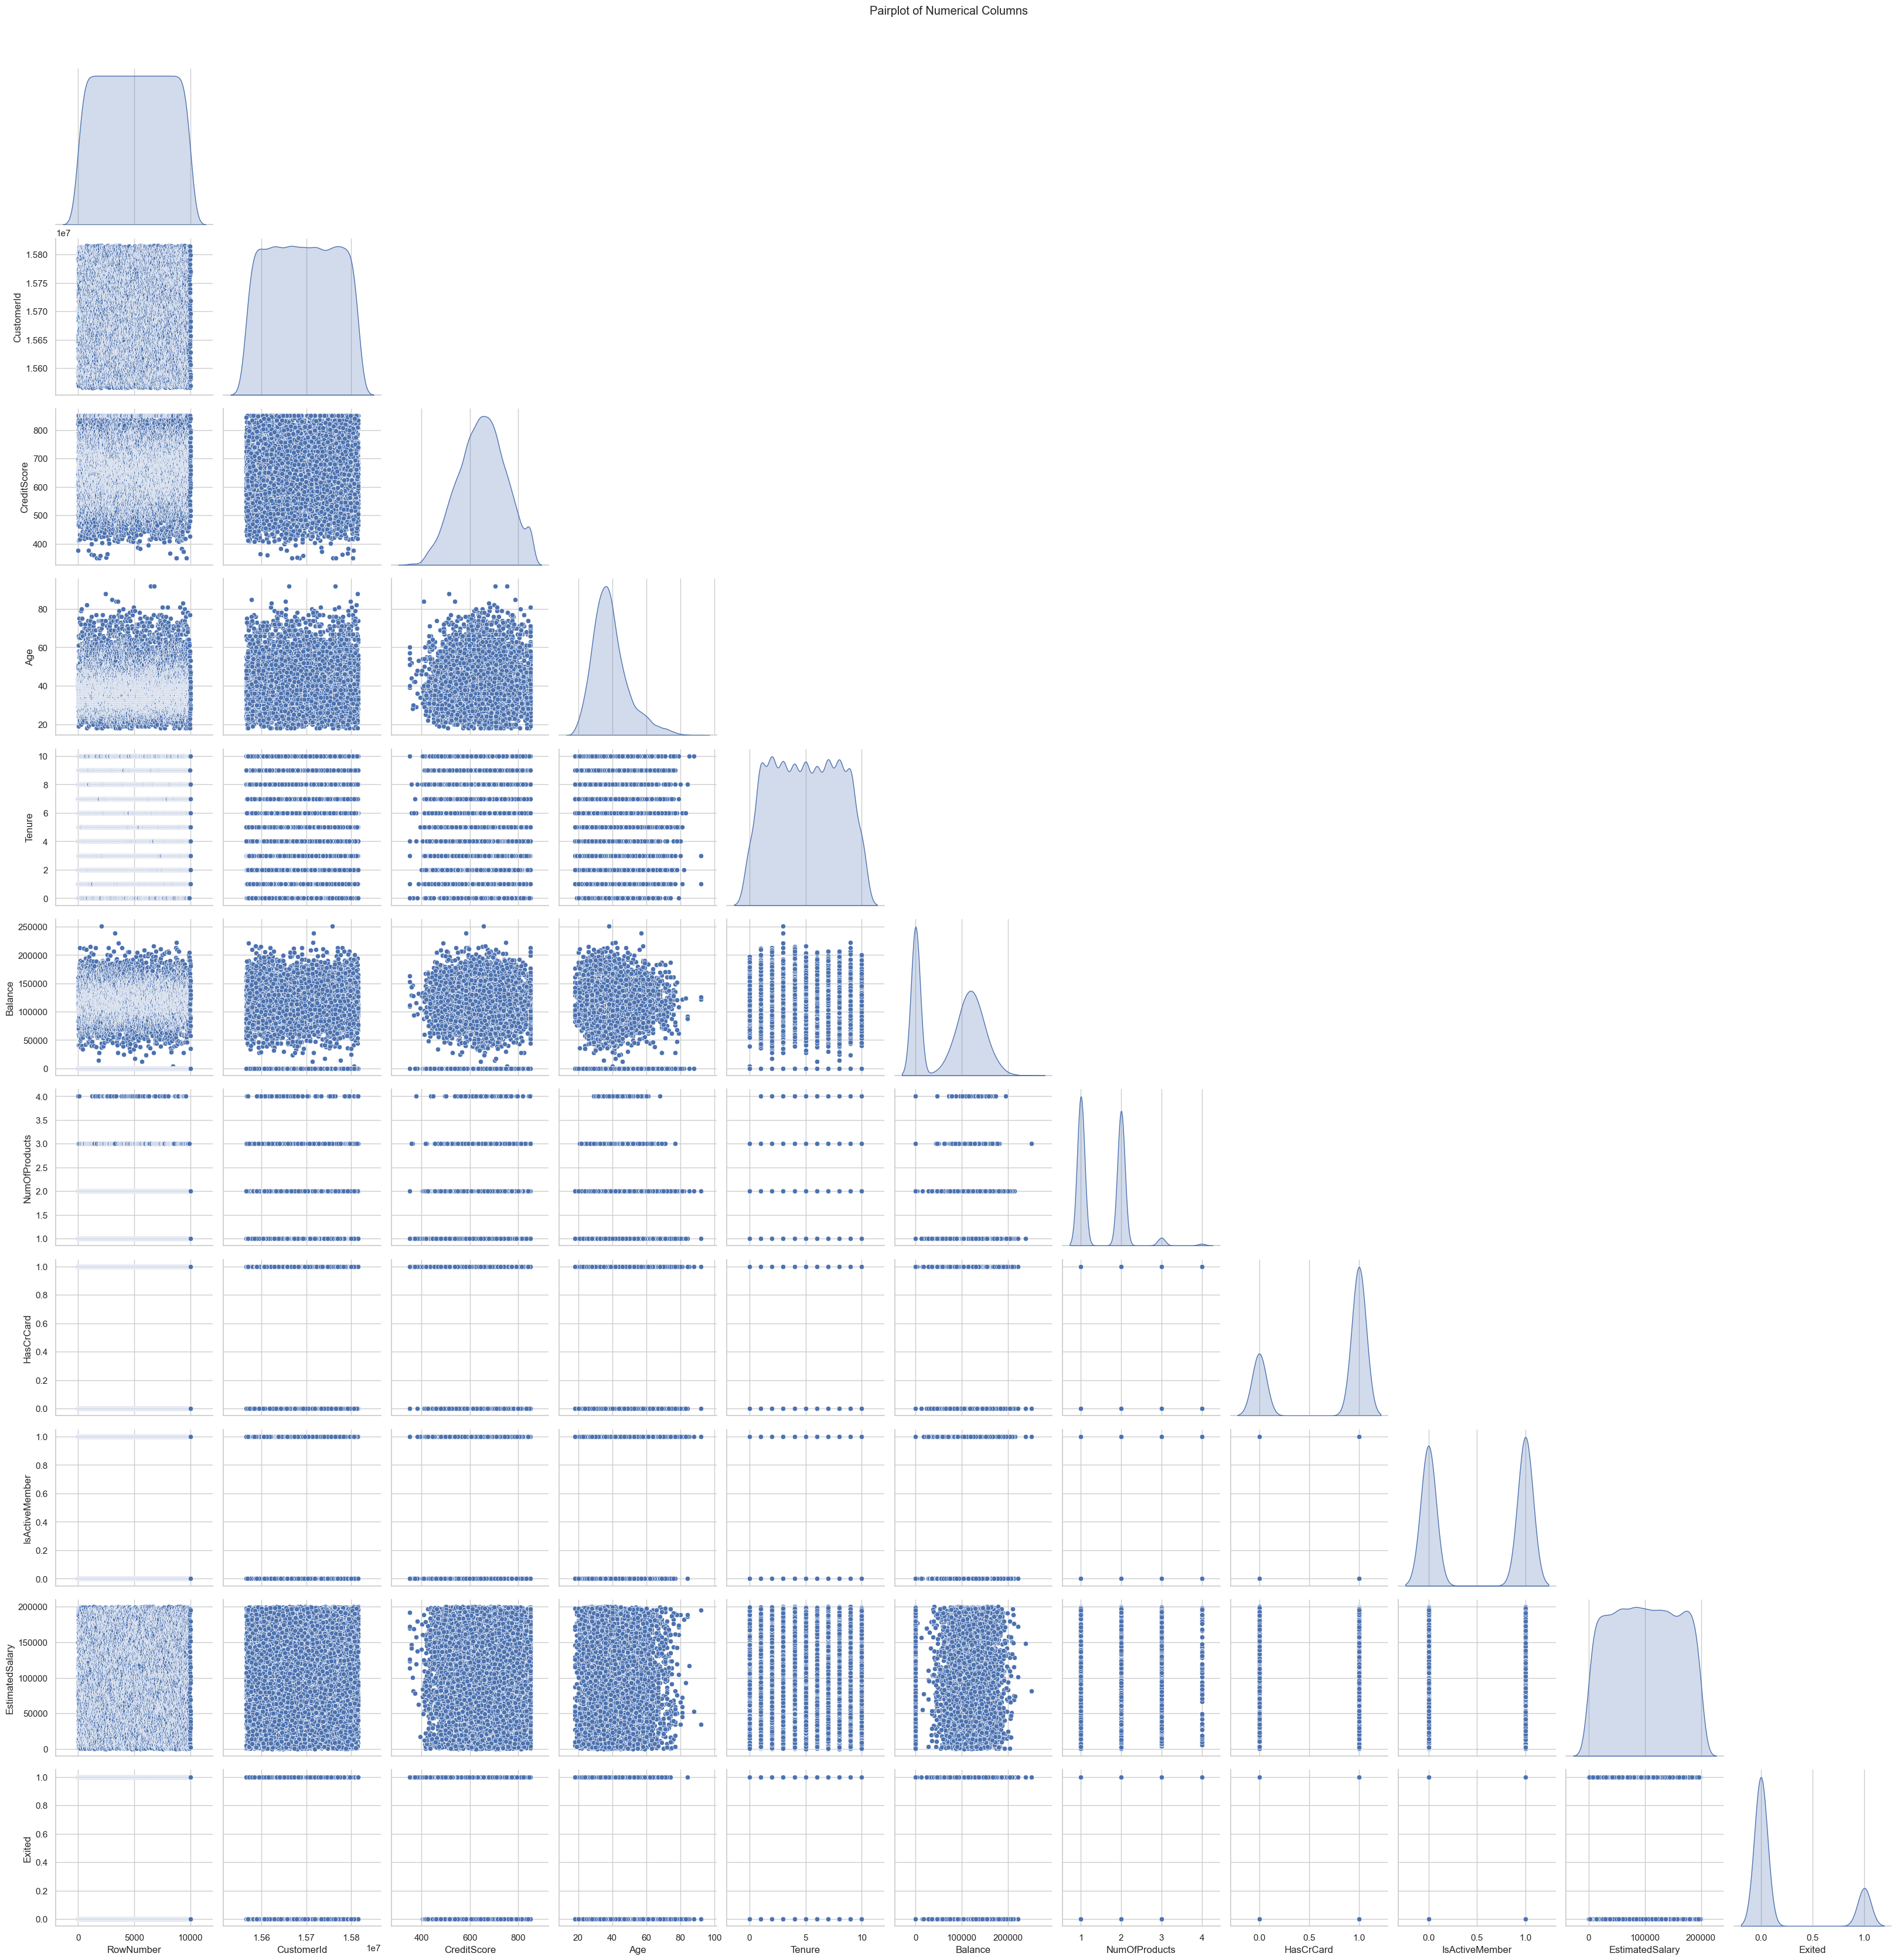

In [194]:
sns.set(style='whitegrid')

## Creating the pairplot
pairplot = sns.pairplot(
    df[numerical_column],              
    diag_kind='kde',                   
    corner=True,                        
    height=3,                         
    aspect=1,                          
    palette='viridis'                   
)

## Defining the title
pairplot.fig.suptitle('Pairplot of Numerical Columns', y=1.02)

## Displaying the plot
plt.show()

#### Analysing the trends for credit score distribution

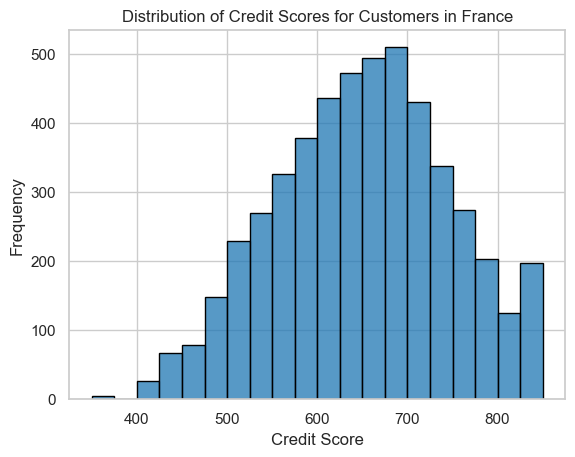

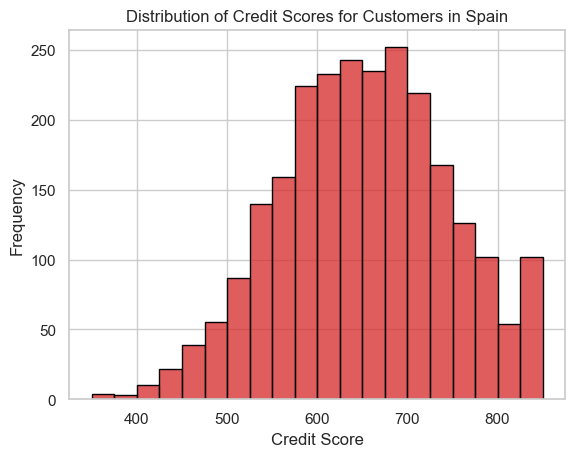

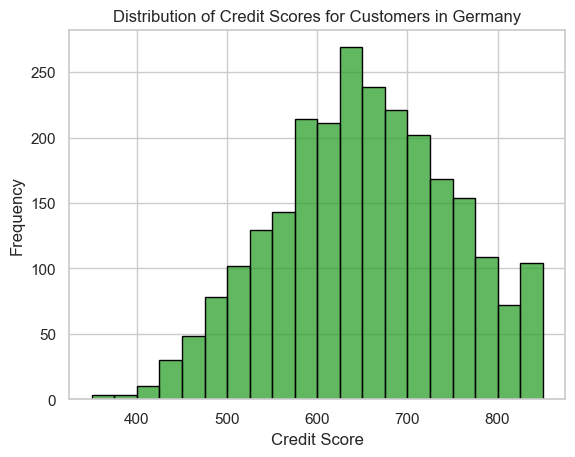

In [196]:
def cred_score_graph(data, geography=None, color=None):
    if geography:
        ## Filtering out the data for the specified geography
        data = data[data['Geography'] == geography]
        title = f'Distribution of Credit Scores for Customers in {geography}'
        
        ## Plotting the histogram for individual geographies
        sns.histplot(data=data, x='CreditScore', bins=20, edgecolor='black', color=color)
    else:
        title = 'Distribution of Credit Scores by Geography'
        # Plot the histogram with the 'multiple' parameter for all geographies
        sns.histplot(data=data, x='CreditScore', bins=20, edgecolor='black', hue='Geography', multiple='stack')
    
    plt.title(title)
    plt.xlabel('Credit Score')
    plt.ylabel('Frequency')
    plt.show()

## Plotting for individual geographies
cred_score_graph(df, geography='France', color='#1f77b4')
cred_score_graph(df, geography='Spain', color='#d62728')
cred_score_graph(df, geography='Germany', color='#2ca02c')

In [197]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## From the above graph, we get the following insights:

1. Credit Score Distribution by Country: Each histogram displays patterns unique to France, Spain, and Germany, illuminating the distribution of credit ratings among consumers in each country.
2. Trends Particular to Geography: The graphs could show which nations have average credit ratings that are higher or lower than others, which might point to differences in lending policies or creditworthiness.
3. Range and Spread: Narrower distributions indicate greater consistency in credit ratings, while larger distributions indicate variability. These metrics offer insights into the financial stability of consumers in each location.



#### Analysing the trends of Estimated Salary of both Male and Female of different Age Groups

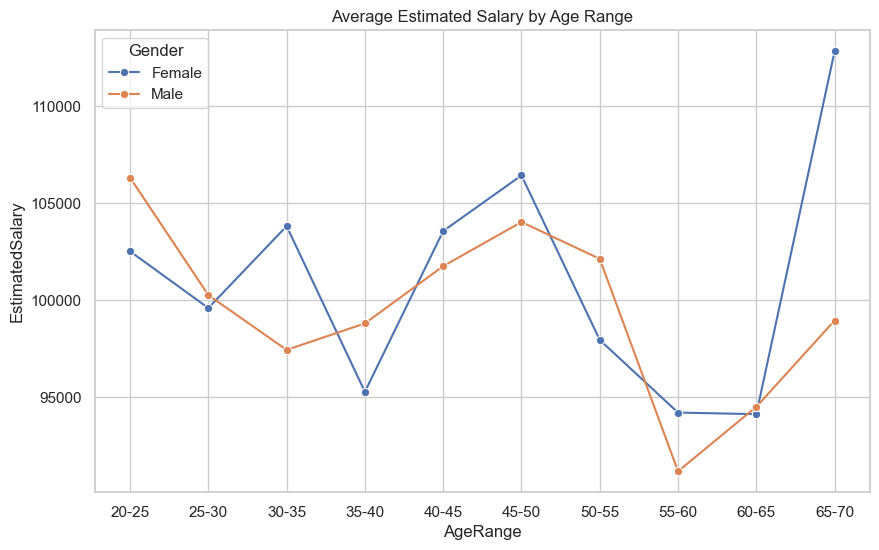

In [200]:
def create_age_range(df, age_col, bins, labels):
    df['AgeRange'] = pd.cut(df[age_col], bins=bins, labels=labels, right=False)
    return df

def calculate_average_salary(df, age_col, salary_col, group_by_cols):
    return df.groupby(group_by_cols, observed=False)[salary_col].mean().reset_index()

def plot_average_salary(data, x_col, y_col, hue_col, title):
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=x_col, y=y_col, data=data, marker='o', hue=hue_col)
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

# Define bins and labels for age ranges
bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
labels = ['20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70']

# Process the bank_data DataFrame
line_data = df.copy()
line_data = create_age_range(line_data, 'Age', bins, labels)

# Calculate average estimated salary by age range and gender
age_salary = calculate_average_salary(line_data, 'AgeRange', 'EstimatedSalary', ['AgeRange', 'Gender'])

# Plot the results
plot_average_salary(age_salary, x_col='AgeRange', y_col='EstimatedSalary', hue_col='Gender', 
                    title='Average Estimated Salary by Age Range')

In [201]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## From the above graph, we get the following insights:

1. Income Trends by Age Groups: We can see long-term patterns in this graph, which illustrates how the average predicted income varies over time for various age groups.
2. Gender wage Differences: Any differences in the average projected wage between men and women over a variety of age groups are displayed in a line plot that is gender-separated.
3. Highest Paying Age Groups: It is possible to determine the age groups with the highest average salaries, which aids in determining the life stages at which each gender has the most earning potential.

## Data Pre Processing

In [204]:
## Checking if there are any outliers using Outlier Detection Strategies


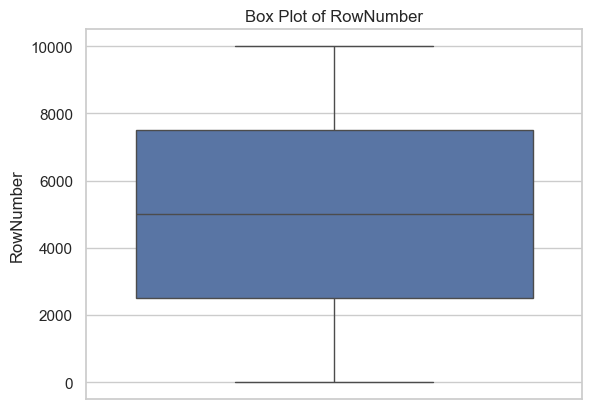

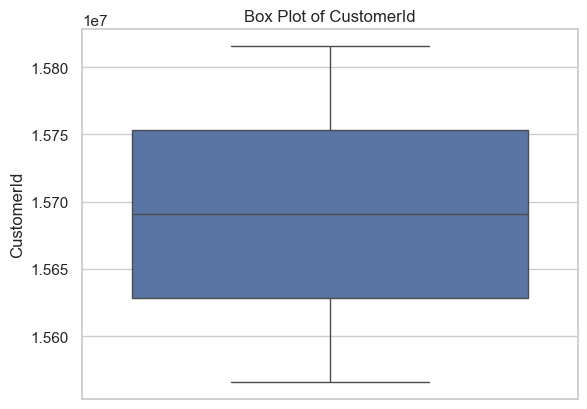

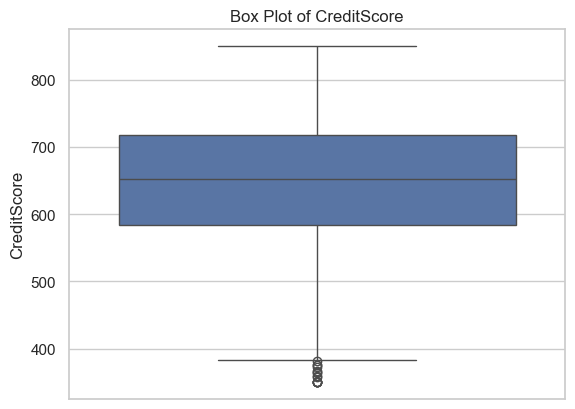

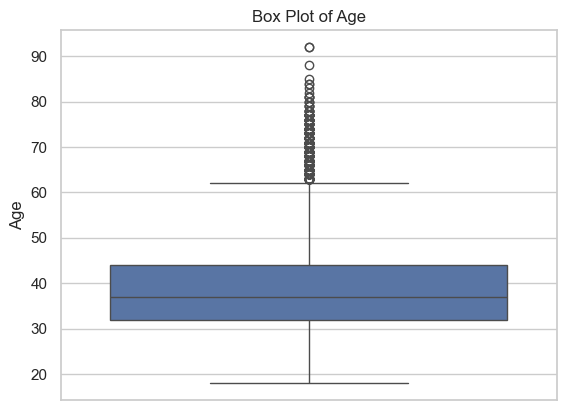

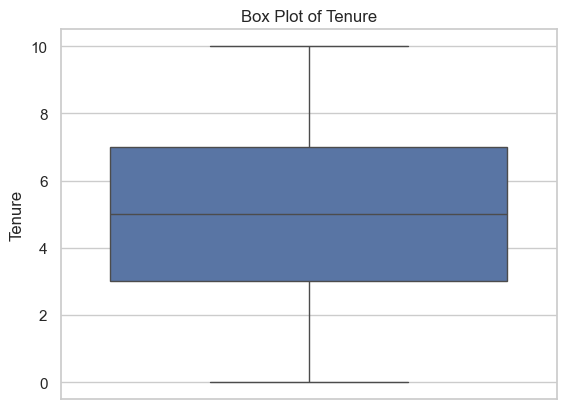

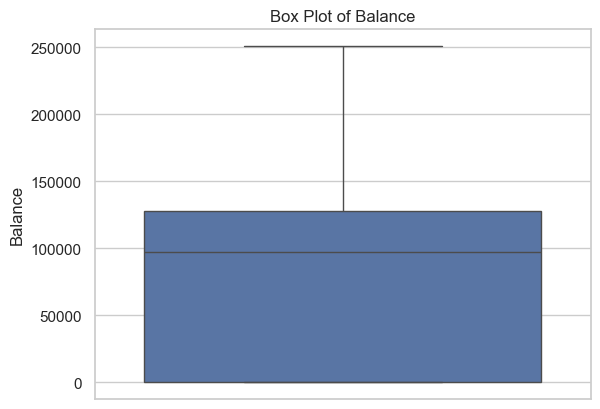

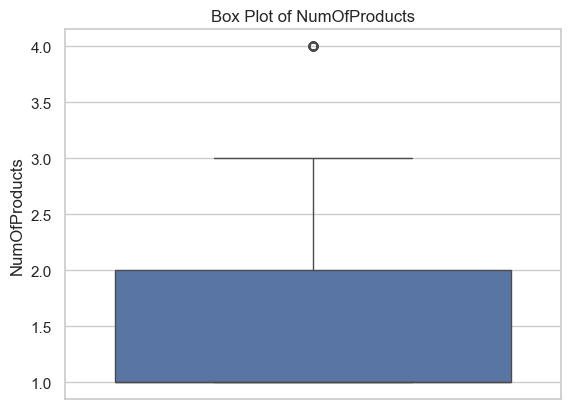

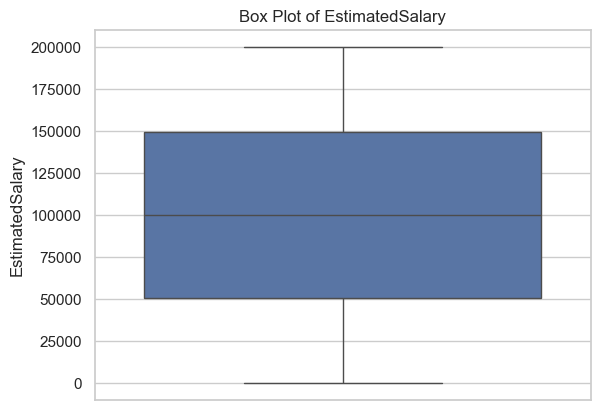

In [205]:
## Defining a function to check if outliers exists
def is_outliers():
    for column_name in df.columns:
        if df[column_name].dtype in ['int64', 'float64']:
            if len(df[column_name].unique()) > 3:
                sns.boxplot(y=df[column_name])
                plt.title(f'Box Plot of {column_name}')
                plt.show()
is_outliers()

In [206]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [207]:
def remove_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with NaN
    column = column.where((column >= lower_bound) & (column <= upper_bound), np.nan)
    return column

numerical_column = df.select_dtypes(include=['int64', 'float64']).columns

outlier_columns = []
for col in numerical_column:
    if col!='Exited':
        capped_column = remove_outliers_iqr(df[col])
        if not capped_column.equals(df[col]):
            outlier_columns.append(col)
        df[col] = capped_column

## Printing the names of columns where outliers were removed
print(f'Outliers were removed in the following columns: {outlier_columns}')


Outliers were removed in the following columns: ['CreditScore', 'Age', 'NumOfProducts']


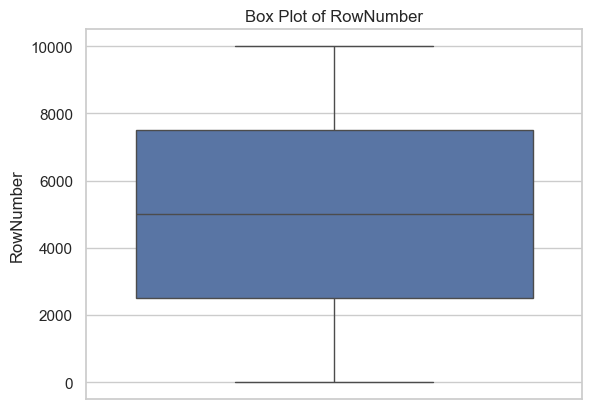

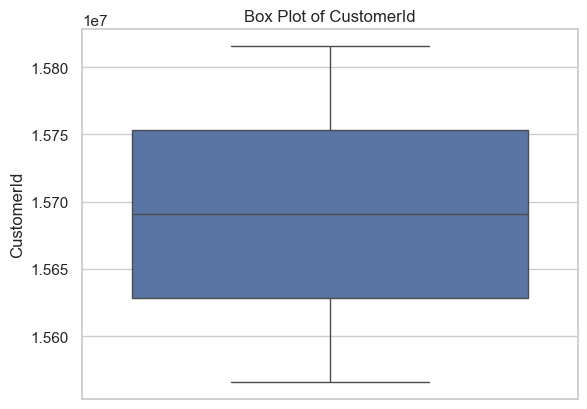

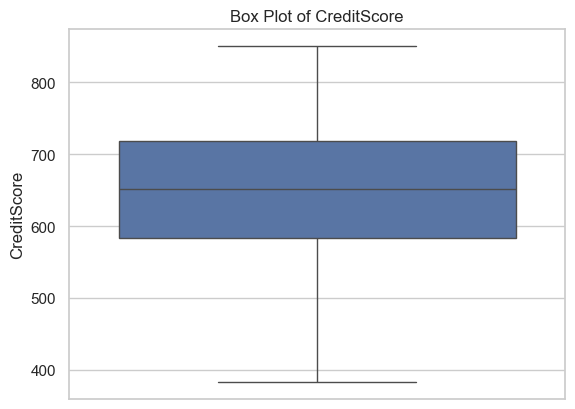

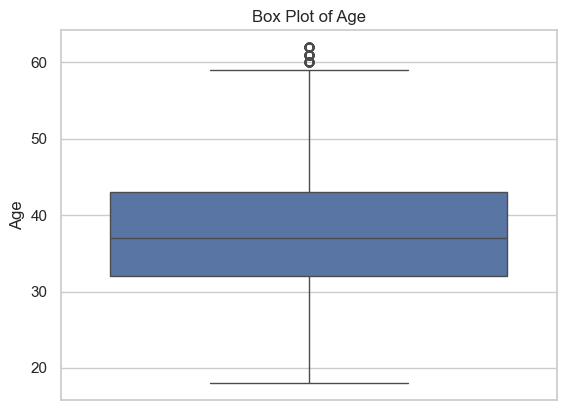

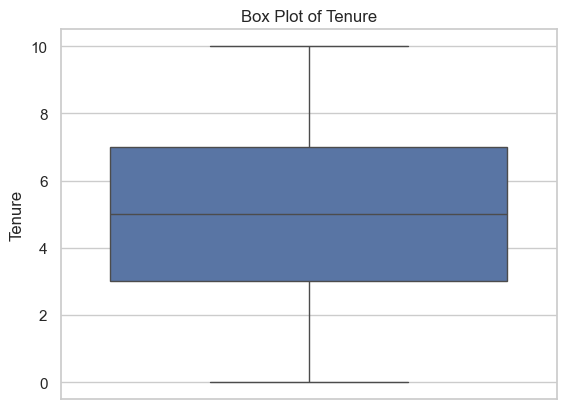

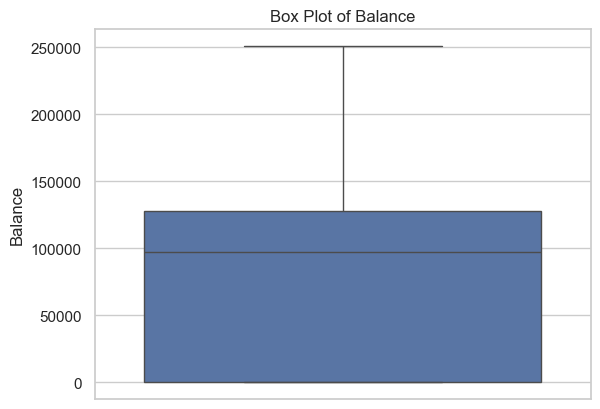

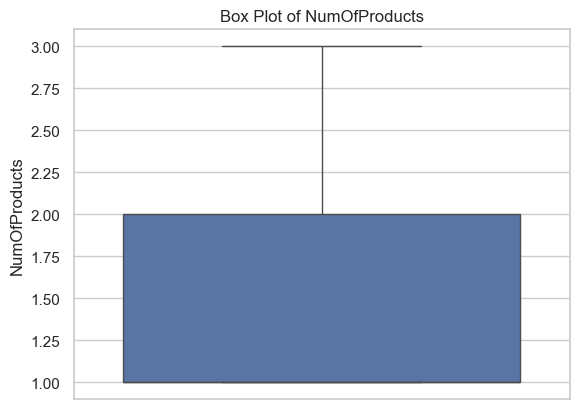

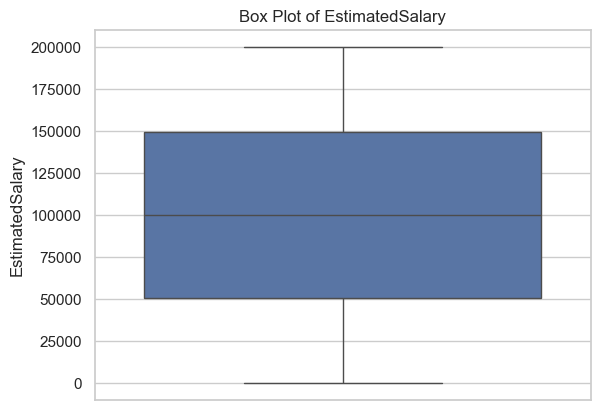

In [208]:
is_outliers()

As a part of data pre processing, we will be removing the unnecessary columns from our dataset

In [210]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42.0,2,0.00,1.0,1,1,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41.0,1,83807.86,1.0,0,1,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42.0,8,159660.80,3.0,1,0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39.0,1,0.00,2.0,0,0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43.0,2,125510.82,1.0,1,1,79084.10,0


In [211]:
## Dropping the useless columns from the dataset using drop method
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,Female,42.0,2,0.00,1.0,1,1,101348.88,1
1,608.0,Spain,Female,41.0,1,83807.86,1.0,0,1,112542.58,0
2,502.0,France,Female,42.0,8,159660.80,3.0,1,0,113931.57,1
3,699.0,France,Female,39.0,1,0.00,2.0,0,0,93826.63,0
4,850.0,Spain,Female,43.0,2,125510.82,1.0,1,1,79084.10,0


From the above data, we see that there are both categorical and numerical columns, we will try to convert all the categorical columns into numerical columns

The following are the categorical columns:
1. Geography
2. Gender

   
Performing the label encoder method


In [214]:
## Initiating the label encoder
labelEncoder = preprocessing.LabelEncoder()

## Encode labels in column 'Geography'.
df['Geography']= labelEncoder.fit_transform(df['Geography'])
## Encode labels in column 'Gender'.
df['Gender']= labelEncoder.fit_transform(df['Gender'])


Performing Simple Imputer Technique that helps in omitting NaN values which contributes majorly for model performance

In [216]:
## An instance of SimpleImputer is created with the strategy set to mean
imputer_mean = SimpleImputer(strategy='mean')  
## An instance of SimpleImputer is created with the strategy set to mode(moost freequent value)
imputer_mode = SimpleImputer(strategy='most_frequent')  

## Using Simple Imputer Strategy mean on all numerical columns
mean_use_cols = ['CreditScore' , 'Age' , 'Tenure' , 'Balance' , 'NumOfProducts' , 'HasCrCard' , 'IsActiveMember', 'EstimatedSalary']

## Using Simple Imputer Strategy mode on all ordinal and nominal columns
mode_use_cols = ['Geography' , 'Gender']

## Performing fit and transform  on the DataFrame
df[mean_use_cols] = imputer_mean.fit_transform(df[mean_use_cols])
df[mode_use_cols] = imputer_mode.fit_transform(df[mode_use_cols])

In [217]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,0,0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1
1,608.0,2,0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0
2,502.0,0,0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1
3,699.0,0,0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0
4,850.0,2,0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0


In [218]:
## Checking if there are any NaN values
df.isna().any().any()

False

At this point, we can say that there are no NaN values in any column

In [220]:
## Printing the correlation matrix which indicates the correlation between each column  using .corr() method
print("Correlation Matrix:")
correlation_matrx = df.corr()
correlation_matrx

Correlation Matrix:


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.008935,-0.003610,-0.012802,-0.000644,0.007071,0.010985,-0.003947,0.023604,0.001608,-0.018330
Geography,0.008935,1.000000,0.004719,0.027868,0.003739,0.069408,0.007914,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.003610,0.004719,1.000000,-0.030450,0.014733,0.012087,-0.013392,0.005766,0.022544,-0.008112,-0.106512
Age,-0.012802,0.027868,-0.030450,1.000000,-0.010206,0.040472,-0.058143,-0.016014,0.017209,-0.004477,0.352396
Tenure,-0.000644,0.003739,0.014733,-0.010206,1.000000,-0.012254,0.011545,0.022583,-0.028362,0.007784,-0.014001
Balance,0.007071,0.069408,0.012087,0.040472,-0.012254,1.000000,-0.329726,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.010985,0.007914,-0.013392,-0.058143,0.011545,-0.329726,1.000000,0.004692,0.011908,0.012840,-0.104341
HasCrCard,-0.003947,-0.008523,0.005766,-0.016014,0.022583,-0.014858,0.004692,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.023604,0.006724,0.022544,0.017209,-0.028362,-0.010084,0.011908,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,0.001608,-0.001369,-0.008112,-0.004477,0.007784,0.012797,0.012840,-0.009933,-0.011421,1.000000,0.012097


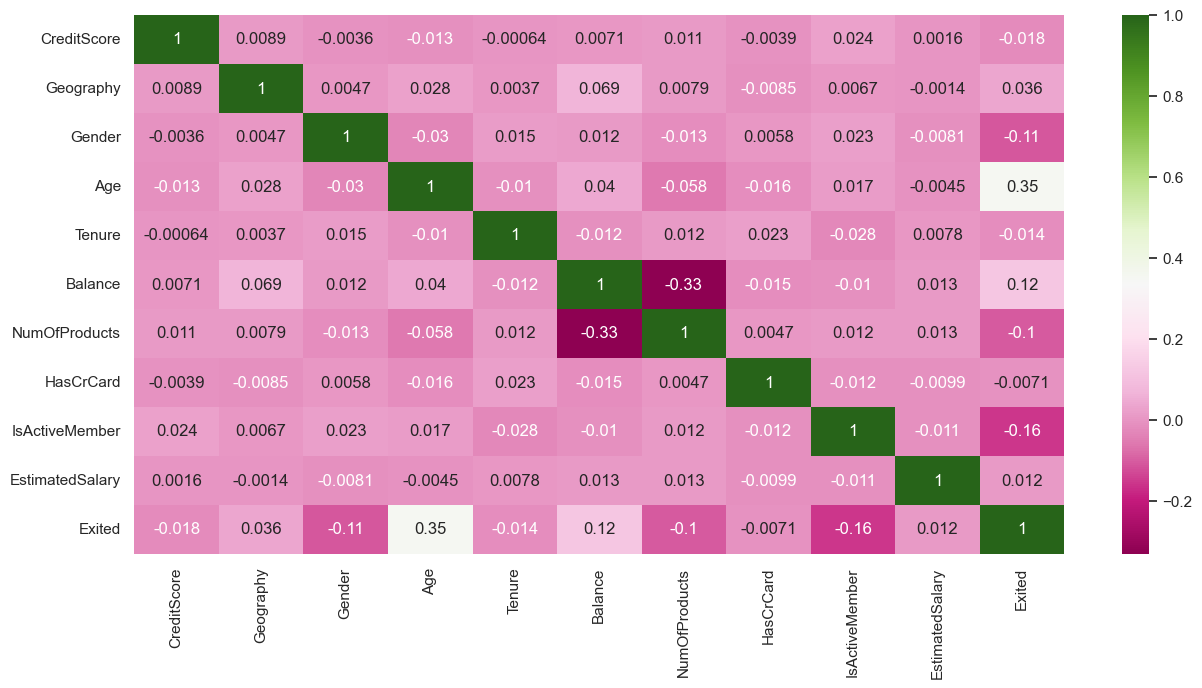

In [221]:
## Heatmap helps to provide graphical representation of correlation amongst all the features
plt.figure(figsize=(15, 7))
sns.heatmap(correlation_matrx, annot=True, cmap='PiYG')
plt.show()

## From the above correlation matrix and heatmap, we get the following insights:
1. Feature Correlation: The heatmap illustrates the strength or weakness of the relationship between the various characteristics in the dataset by displaying the correlation between them.
2. Positive and Negative Correlations: significant negative correlations (lighter colors) imply an inverse link between characteristics, whereas significant positive correlations (darker shades) show that two features move in the same direction.
3. Crucial Elements: Elements with high correlation values—positive or negative—are probably going to have a bigger impact on the model's predictions than elements with low correlation values, which could have a smaller impact overall.











## Splitting the dataset 

In [224]:
## Assigning the target variable into y and all the other features of the dataset into X
y = df['Exited']
X = df.drop(columns=['Exited'])

## Splitting the dataset into test and train data with test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

### Here, we are trying to build three machine learning models and compare the statistics


## Model - 1 using KNN Algorithm

#### Model Buiulding

In [228]:
## Initializing the StandardScaler
std_scaler = StandardScaler()

## Fitting and transform the scaler on the training data 
X_train = std_scaler.fit_transform(X_train)

##Performing just transfrom on test data
X_test = std_scaler.transform(X_test)

## Initializing the KNN classifier with a random value k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=3)

In [229]:
## Fitting the model on the training data
knn_classifier.fit(X_train, y_train)

## Predicting the values on the test data
y_pred_knn = knn_classifier.predict(X_test)

#### Model Evaluation

In [231]:
## Print the confusion matrix and classification report
print("Confusion Matrix of KNN Model:")
print(confusion_matrix(y_test, y_pred_knn))

#Determing the accuracy score of training and test data usinhg accuracy_score method
training_score_knn = accuracy_score(knn_classifier.predict(X_train), y_train)
testing_score_knn = accuracy_score(y_pred_knn , y_test)

#Printing the accuracy of both train and test data
print("Accuracy of train data for KNN model is", training_score_knn)
print("Accuracy of test data for KNN model is", testing_score_knn)
print("--------------------------------------")
#Printing the classification report
print("Classification Report of KNN Algorithm")
print("--------------------------------------")
print(classification_report(y_test, y_pred_knn))

Confusion Matrix of KNN Model:
[[1493  114]
 [ 234  159]]
Accuracy of train data for KNN model is 0.896875
Accuracy of test data for KNN model is 0.826
--------------------------------------
Classification Report of KNN Algorithm
--------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      1607
           1       0.58      0.40      0.48       393

    accuracy                           0.83      2000
   macro avg       0.72      0.67      0.69      2000
weighted avg       0.81      0.83      0.81      2000



## Model - 2 using Descion Tree Algorithm

#### Model Building

In [234]:
## Initializing the Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

## Fit the model on the training data
decision_tree_classifier.fit(X_train, y_train)

## Predicting the values on test data
y_pred_dt = decision_tree_classifier.predict(X_test)


#### Model Performance Evaluation

In [236]:
# Print the confusion matrix and classification report
print("Confusion Matrix of Decision Tree Model:")
print(confusion_matrix(y_test, y_pred_dt))

#Determing the accuracy score of training and test data using accuracy_score method of Decision Tree Model
training_score_dt = accuracy_score(decision_tree_classifier.predict(X_train), y_train)
testing_score_dt = accuracy_score(y_pred_dt , y_test)

#Printing the accuracy of both train and test data for Decision Tree Model
print("Accuracy of train data for Decision Tree Model", training_score_dt)
print("Accuracy of test data for Decision Tree Model", testing_score_dt)
print("--------------------------------------")
#Printing the classification report of Decision Tree Model
print("Classification Report of Decision Tree Model")
print("--------------------------------------")
print(classification_report(y_test, y_pred_dt))


Confusion Matrix of Decision Tree Model:
[[1361  246]
 [ 204  189]]
Accuracy of train data for Decision Tree Model 1.0
Accuracy of test data for Decision Tree Model 0.775
--------------------------------------
Classification Report of Decision Tree Model
--------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1607
           1       0.43      0.48      0.46       393

    accuracy                           0.78      2000
   macro avg       0.65      0.66      0.66      2000
weighted avg       0.78      0.78      0.78      2000



## Model - 3 using XGBoost Algorithm

#### Model Building

In [239]:
# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')


In [240]:
# Fit the model on the training data
xgb_classifier.fit(X_train, y_train)
# Make predictions on the test data
y_pred_xg = xgb_classifier.predict(X_test)


#### Model Performance Evaluation

In [242]:
# Print the confusion matrix and classification report
print("Confusion Matrix of XGBoost Classifier Model:")
print(confusion_matrix(y_test, y_pred_xg))

#Determing the accuracy score of training and test data using accuracy_score method for XGBoost Classifier Model:
training_score_xg = accuracy_score(xgb_classifier.predict(X_train), y_train)
testing_score_xg = accuracy_score(y_pred_xg , y_test)

#Printing the accuracy of both train and test data of XGBoost Classifier Model:
print("Accuracy of train data for XGBoost Classifier Model:", training_score_xg)
print("Accuracy of test data for XGBoost Classifier Model:", testing_score_xg)
print("--------------------------------------")
#Printing the classification report for XGBoost Classifier Model:
print("Classification Report of XGBoost Classifier Model:")
print("--------------------------------------")
print(classification_report(y_test, y_pred_xg))


Confusion Matrix of XGBoost Classifier Model:
[[1521   86]
 [ 203  190]]
Accuracy of train data for XGBoost Classifier Model: 0.962625
Accuracy of test data for XGBoost Classifier Model: 0.8555
--------------------------------------
Classification Report of XGBoost Classifier Model:
--------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1607
           1       0.69      0.48      0.57       393

    accuracy                           0.86      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.84      0.86      0.85      2000



## Visualization of metrics of three models

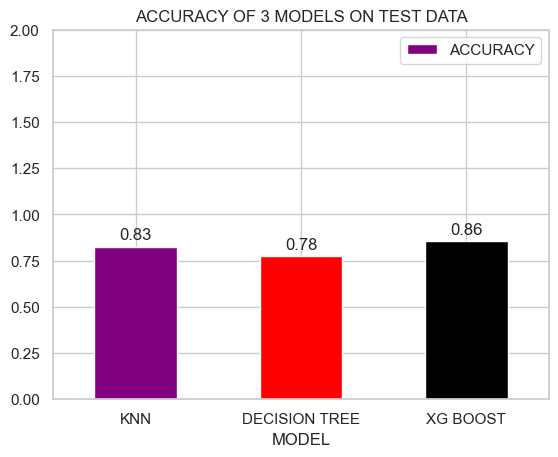

In [244]:
## Visualizing the accuracy of three models by creating a bar graph on test data

## Define colors and accuracy data
colors = ['purple', 'red', 'black']
df_accuracy_tr = pd.DataFrame({'MODEL':['KNN', 'DECISION TREE', 'XG BOOST'], 'ACCURACY':[testing_score_knn , testing_score_dt , testing_score_xg]})

## Creating bar plot
ax = df_accuracy_tr.plot.bar(x='MODEL', y='ACCURACY', rot=0, ylim=(0, 2), title="ACCURACY OF 3 MODELS ON TEST DATA", color=colors, legend=True)

## Adding value labels on top of each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fmt='%.2f', padding=3)

## Displaying the plot
plt.show()

## From the above graph, we get the following insights:
1. Model Performance: A visual comparison of the KNN, Decision Tree, and XGBoost models' accuracy on test data is provided by the bar chart.
2. Most Accurate Model: The model that performs the best on the test data, demonstrating more prediction dependability, is the one with the biggest accuracy number, or bar.
3. Accuracy Comparison: Taller bars indicate stronger predicted accuracy and possible job appropriateness, while differences in bar heights emphasize performance gaps across the models.


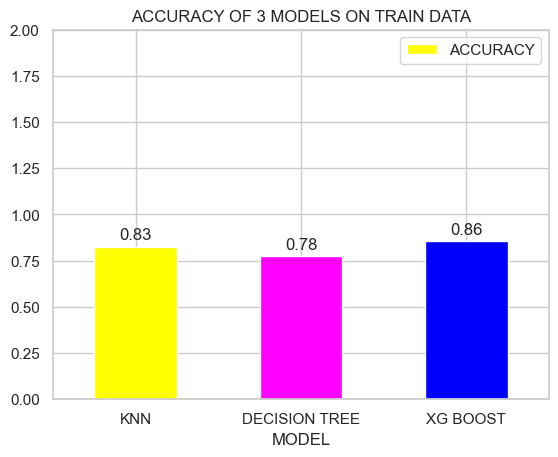

In [246]:
## Visualizing the accuracy of three models by creating a bar graph on train data

## Define colors and accuracy data
colors = ['yellow', 'magenta', 'blue']
df_accuracy_ts = pd.DataFrame({'MODEL':['KNN', 'DECISION TREE', 'XG BOOST'], 'ACCURACY':[testing_score_knn , testing_score_dt , testing_score_xg]})

## Creating bar plot
ax = df_accuracy_ts.plot.bar(x='MODEL', y='ACCURACY', rot=0, ylim=(0, 2), title="ACCURACY OF 3 MODELS ON TRAIN DATA", color=colors, legend=True)

## Adding value labels on top of each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fmt='%.2f', padding=3)

## Displaying the plot
plt.show()

## From the above graph, we get the following insights:
1. Model Comparison: The bar chart displays the KNN, Decision Tree, and XGBoost models' respective overall performance and accuracy on test data.
2. Highest Accuracy: The model that performs best on the test data is shown by the tallest bar, which reflects the most accurate model.
3. Performance Differences: Higher bars suggest more accuracy and maybe more dependable forecasts, making it easier to rapidly determine which model performs better.






<Axes: title={'center': 'F1_Score Of Churn Status from XG Boost Model'}, xlabel='CHURN STATUS'>

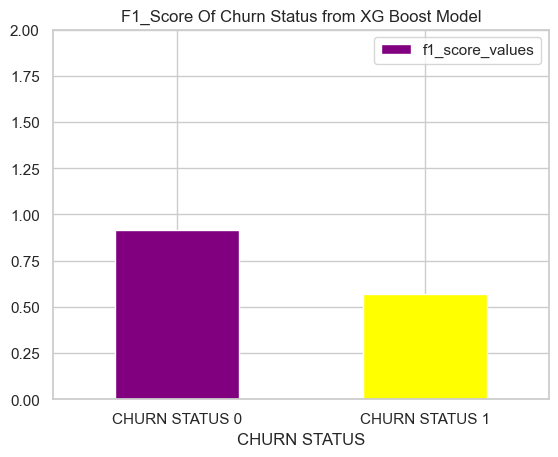

In [248]:
## Visualizing the f1-score for both churn status which is exited and not exited
##
f1Score_XG = f1_score(y_test, y_pred_xg, average=None)

f1_score_0 =f1Score_XG[0]
f1_score_1 = f1Score_XG[1]

## Define colors and accuracy data
colors = ['purple','yellow']

df_f1_score = pd.DataFrame({'CHURN STATUS':['CHURN STATUS 0', 'CHURN STATUS 1'], 'f1_score_values':[f1_score_0 , f1_score_1]})

df_f1_score.plot.bar(x = 'CHURN STATUS' , y = 'f1_score_values', rot=0 , ylim = (0,2), title = "F1_Score Of Churn Status from XG Boost Model", color= colors,legend = True)

## From the above graph, we get the following insights:
1. F1-scores for churners and non-churners are displayed in the graphic, emphasizing the predictive power of the model.

2. Higher F1-scores indicate stronger customer retention predictions for non-churners.

3. High scores that are balanced show excellent performance for both groups in terms of memory and precision.






## CONCLUSION
Using the Churn_modelling dataset, I have effectively constructed a predictive model for customer churn in this portfolio challenge. The algorithm efficiently determines churn status by examining a range of client attributes, offering the bank insightful information on customer retention tactics. The bank may better understand client behavior and mitigate any churn risks by utilizing the predictive capabilities of the model. This study highlights the significance of using data analytics to enhance customer relationship management and spur corporate growth through meticulous data pretreatment, feature selection, and model validation.